In [24]:
from sklearn.svm import SVR
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime

In [36]:
df=pd.read_csv('df_jepx_spotsum.csv', parse_dates=['DATETIME']) 
df = df.set_index('DATETIME')

In [37]:
df

,DATE,TIME,TIME_CODE,SELL_VOLUME,BUY_VOLUME,TOTAL_VOLUME,SYSTEM_PRICE,HOKKAIDO,TOHOKU,TOKYO,CHUBU,HOKURIKU,KANSAI,CHUGOKU,SHIKOKU,KYUSHU,SELL_VOLUME_BLOCK_ORDERS,SELL_VOLUME_CONTRACTED_BLOCK_ORDERS,BUY_VOLUME_BLOCK_ORDERS,BUY_VOLUME_CONTRACTED_BLOCK_ORDERS
DATETIME,,,,,,,,,,,,,,,,,,,,
2005-04-02 00:00:00,4/2/2005,0:00:00,1,676500,198000,0,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,NaN,NaN,NaN,NaN
2005-04-02 00:30:00,4/2/2005,0:30:00,2,676500,192000,0,6.65,6.65,6.65,6.65,6.65,6.65,6.65,6.65,6.65,6.65,NaN,NaN,NaN,NaN
2005-04-02 01:00:00,4/2/2005,1:00:00,3,670000,189000,10000,6.39,6.39,6.39,6.39,6.39,6.39,6.39,6.39,6.39,6.39,NaN,NaN,NaN,NaN
2005-04-02 01:30:00,4/2/2005,1:30:00,4,670000,186500,10000,6.39,6.39,6.39,6.39,6.39,6.39,6.39,6.39,6.39,6.39,NaN,NaN,NaN,NaN
2005-04-02 02:00:00,4/2/2005,2:00:00,5,676500,184500,15000,5.68,5.68,5.68,5.68,5.68,5.68,5.68,5.68,5.68,5.68,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01 21:30:00,11/1/2023,21:30:00,44,20369050,15424650,11992350,13.91,15.65,15.65,15.65,15.65,11.30,11.30,11.30,11.30,11.30,7115700.0,728850.0,1744300.0,900100.0
2023-11-01 22:00:00,11/1/2023,22:00:00,45,20207250,14911450,11945650,13.14,15.93,15.93,15.93,15.93,10.19,10.19,10.19,10.19,10.19,7091750.0,718400.0,1585250.0,917600.0
2023-11-01 22:30:00,11/1/2023,22:30:00,46,20286450,14492850,11939950,12.75,15.51,15.51,15.51,15.51,10.19,10.19,10.19,10.19,10.19,6911350.0,683350.0,1368350.0,950700.0


In [44]:
df = df.tail(1)
df 

,DATE,TIME,TIME_CODE,SELL_VOLUME,BUY_VOLUME,TOTAL_VOLUME,SYSTEM_PRICE,HOKKAIDO,TOHOKU,TOKYO,CHUBU,HOKURIKU,KANSAI,CHUGOKU,SHIKOKU,KYUSHU,SELL_VOLUME_BLOCK_ORDERS,SELL_VOLUME_CONTRACTED_BLOCK_ORDERS,BUY_VOLUME_BLOCK_ORDERS,BUY_VOLUME_CONTRACTED_BLOCK_ORDERS
DATETIME,,,,,,,,,,,,,,,,,,,,
2023-11-01 23:30:00,11/1/2023,23:30:00,48,18472750,13315600,11377100,11.69,15.0,15.0,15.0,13.39,10.01,10.01,10.01,10.01,10.01,5106900.0,508100.0,678600.0,665950.0


<Axes: xlabel='DATETIME'>

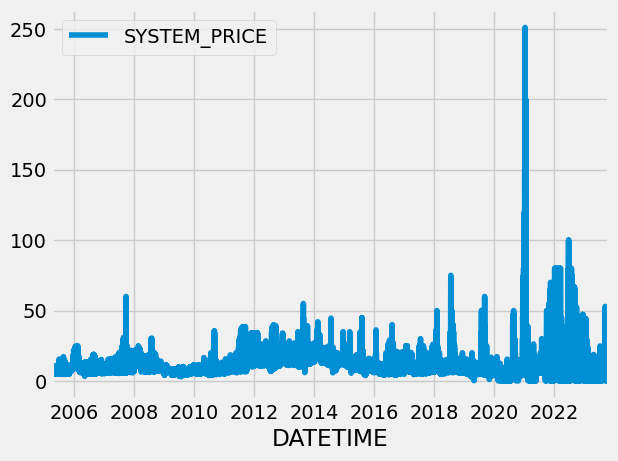

In [43]:
 df['SYSTEM_PRICE'].plot(legend = True)
